In [7]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [8]:
n_clusters = 1584

INPUT_PATH = f'../../../Results/Workflow_Testing/Selection_effect_exploring_PoC_C_{n_clusters}/'

df_LinearSVC = pd.read_csv(f'{INPUT_PATH}LinearSVC.csv')
df_SVC = pd.read_csv(f'{INPUT_PATH}SVC.csv')
df_RF = pd.read_csv(f'{INPUT_PATH}RF.csv')

INPUT_PATH_CLUSTERED = '../../../Results/Workflow_Testing/Cluster_effect_exploring_PoC/'

df_LinearSVC_C = pd.read_csv(f'{INPUT_PATH_CLUSTERED}LinearSVC.csv', index_col=0)
df_SVC_C = pd.read_csv(f'{INPUT_PATH_CLUSTERED}SVC.csv', index_col=0)
df_RF_C = pd.read_csv(f'{INPUT_PATH_CLUSTERED}RF.csv', index_col=0)

LinearSVC_row = df_LinearSVC_C.loc[n_clusters]
SVC_row = df_SVC_C.loc[n_clusters]
RF_row = df_RF_C.loc[n_clusters]

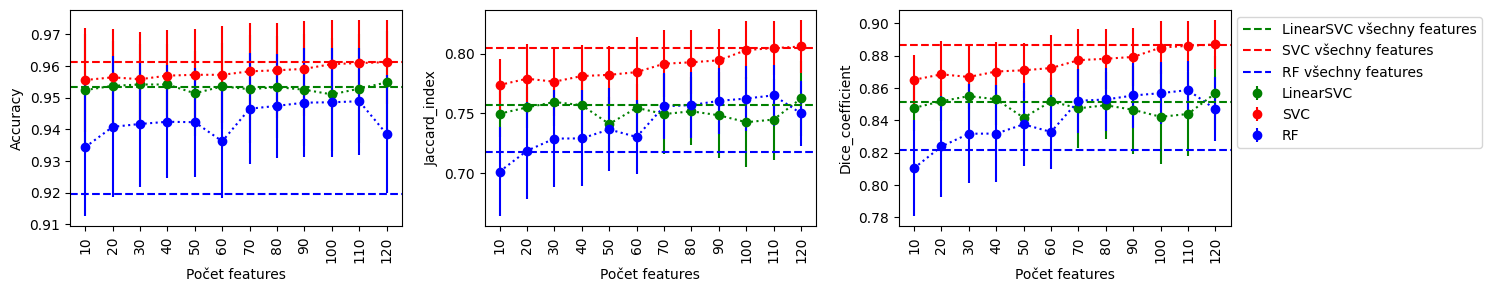

In [9]:
col_names = list(['Accuracy', 'Jaccard_index', 'Dice_coefficient'])
x = list(df_LinearSVC.index)

fig, axes = plt.subplots(nrows=1, ncols=len(col_names), figsize=(15, 3))

for i, column in enumerate(col_names):

    axes[i].plot(x, df_LinearSVC[f'{column}_mean'], color='green', linestyle=':')
    axes[i].errorbar(x, df_LinearSVC[f'{column}_mean'], yerr=df_LinearSVC[f'{column}_std'], fmt='o', color='green', label=f'LinearSVC')

    axes[i].plot(x, df_SVC[f'{column}_mean'], color='red', linestyle=':')
    axes[i].errorbar(x, df_SVC[f'{column}_mean'], yerr=df_SVC[f'{column}_std'], fmt='o', color='red', label=f'SVC')

    axes[i].plot(x, df_RF[f'{column}_mean'], color='blue', linestyle=':')
    axes[i].errorbar(x, df_RF[f'{column}_mean'], yerr=df_RF[f'{column}_std'], fmt='o', color='blue', label=f'RF')

    axes[i].set_xticks(list(df_LinearSVC.index))
    axes[i].set_xticklabels(list(df_LinearSVC['n_features'].values))
    axes[i].set_xlabel('Počet features')
    axes[i].set_ylabel(f'{column}')
    axes[i].tick_params(axis='x', rotation=90)

    axes[i].axhline(y=LinearSVC_row[f'{column}_mean'], color='g', linestyle='--', label=f'LinearSVC všechny features')
    axes[i].axhline(y=SVC_row[f'{column}_mean'], color='r', linestyle='--', label=f'SVC všechny features')
    axes[i].axhline(y=RF_row[f'{column}_mean'], color='b', linestyle='--', label=f'RF všechny features')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(pad=1.0)
plt.savefig(f'{INPUT_PATH}metrics.png')
plt.show()

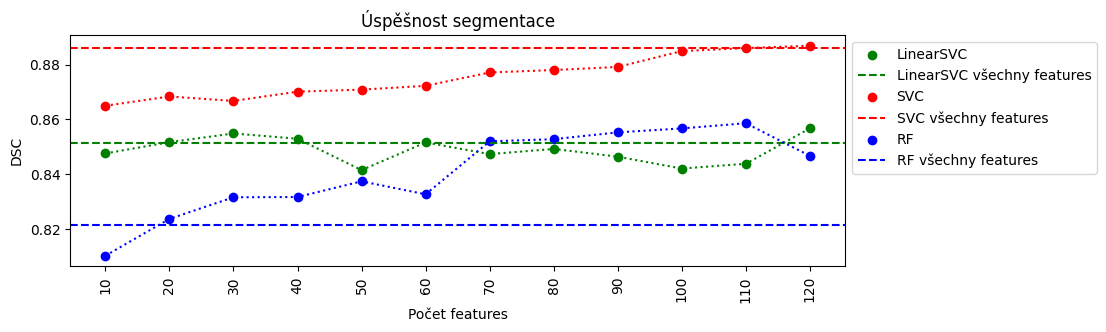

In [10]:
plt.figure(figsize=(10,3))

# LinearSVC
plt.plot(df_LinearSVC[f'Dice_coefficient_mean'], color='green', linestyle=':')
plt.scatter(list(df_LinearSVC.index), df_LinearSVC[f'Dice_coefficient_mean'], marker='o', color='green', label='LinearSVC')

plt.axhline(y=LinearSVC_row[f'Dice_coefficient_mean'], color='g', linestyle='--', label=f'LinearSVC všechny features')

# SVC
plt.plot(df_SVC[f'Dice_coefficient_mean'], color='red', linestyle=':')
plt.scatter(list(df_SVC.index), df_SVC[f'Dice_coefficient_mean'], marker='o', color='red', label='SVC')

plt.axhline(y=SVC_row[f'Dice_coefficient_mean'], color='r', linestyle='--', label=f'SVC všechny features')

# RF
plt.plot(df_RF[f'Dice_coefficient_mean'], color='blue', linestyle=':')
plt.scatter(list(df_RF.index), df_RF[f'Dice_coefficient_mean'], marker='o', color='blue', label='RF')

plt.axhline(y=RF_row[f'Dice_coefficient_mean'], color='b', linestyle='--', label=f'RF všechny features')

# Settings
plt.title('Úspěšnost segmentace')
plt.xlabel('Počet features')
plt.ylabel('DSC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(list(df_RF.index), labels=list(df_RF['n_features'].values))
plt.tick_params(axis='x', rotation=90)
plt.show()

In [11]:
max_LinearSVC = df_LinearSVC['Dice_coefficient_mean'].idxmax()
max_SVC = df_SVC['Dice_coefficient_mean'].idxmax()
max_RF = df_RF['Dice_coefficient_mean'].idxmax()

print(f"LinearSVC má maximální DSC: {df_LinearSVC.at[max_LinearSVC, 'Dice_coefficient_mean']:.3f} +- {df_LinearSVC.at[max_LinearSVC, 'Dice_coefficient_std']:.3f} a to pro {df_LinearSVC.at[max_LinearSVC, 'n_features']} features.")
print(f"SVC má maximální DSC: {df_SVC.at[max_SVC, 'Dice_coefficient_mean']:.3f} +- {df_SVC.at[max_SVC, 'Dice_coefficient_std']:.3f} a to pro {df_SVC.at[max_SVC, 'n_features']} features.")
print(f"RF má maximální DSC: {df_RF.at[max_RF, 'Dice_coefficient_mean']:.3f} +- {df_RF.at[max_RF, 'Dice_coefficient_std']:.3f} a to pro {df_RF.at[max_RF, 'n_features']} features.")

LinearSVC má maximální DSC: 0.857 +- 0.023 a to pro 120 features.
SVC má maximální DSC: 0.887 +- 0.015 a to pro 120 features.
RF má maximální DSC: 0.859 +- 0.018 a to pro 110 features.


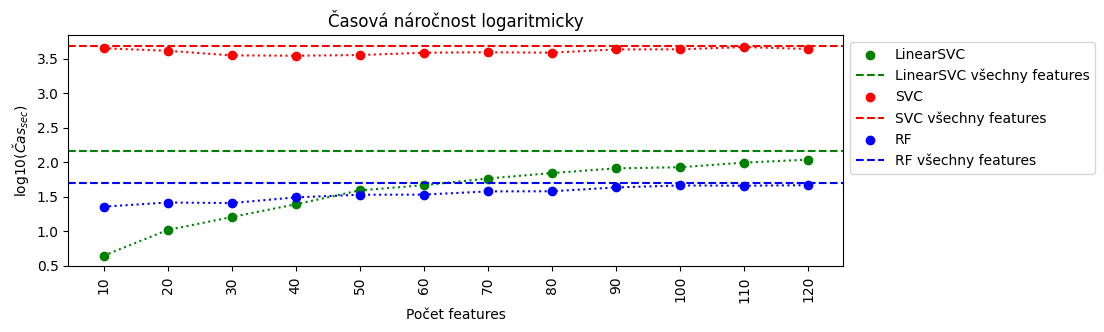

In [13]:
plt.figure(figsize=(10,3))

# LinearSVC
plt.scatter(df_LinearSVC.index, np.log10(df_LinearSVC['Time']), color='green', label='LinearSVC')
plt.plot(df_LinearSVC.index, np.log10(df_LinearSVC['Time']), color='green', linestyle=':')

plt.axhline(y=np.log10(LinearSVC_row['Time']), color='g', linestyle='--', label='LinearSVC všechny features')

# SVC
plt.scatter(df_SVC.index, np.log10(df_SVC['Time']), color='red', label='SVC')
plt.plot(df_SVC.index, np.log10(df_SVC['Time']), color='red', linestyle=':')

plt.axhline(y=np.log10(SVC_row['Time']), color='r', linestyle='--', label='SVC všechny features')

# RF
plt.scatter(df_RF.index, np.log10(df_RF['Time']), color='blue', label='RF')
plt.plot(df_RF.index, np.log10(df_RF['Time']), color='blue', linestyle=':')

plt.axhline(y=np.log10(RF_row['Time']), color='b', linestyle='--', label='RF všechny features')

# Settings
plt.title('Časová náročnost logaritmicky')
plt.xlabel('Počet features')
plt.ylabel('log10($Čas_{sec}$)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(list(df_RF.index), labels=list(df_RF['n_features'].values))
plt.tick_params(axis='x', rotation=90)

plt.show()